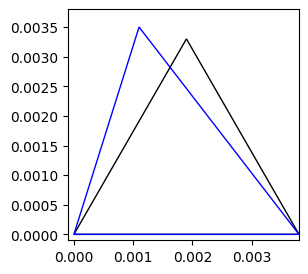

In [1]:
import torch
import matplotlib.pyplot as plt

tri1 = torch.tensor([[0.0000, 0.0000], [0.0038, 0.0000], [0.0019, 0.0033]])
tri2 = torch.tensor([[0.0000, 0.0000], [0.0038, 0.0000], [0.0011, 0.0035]])

plt.figure(figsize=(3, 3))
plt.gca().add_patch(plt.Polygon(tri1, edgecolor='black', fill=None))
plt.gca().add_patch(plt.Polygon(tri2, edgecolor='blue', fill=None))

plt.xlim(-0.0001, 0.0038)
plt.ylim(-0.0001, 0.0038)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

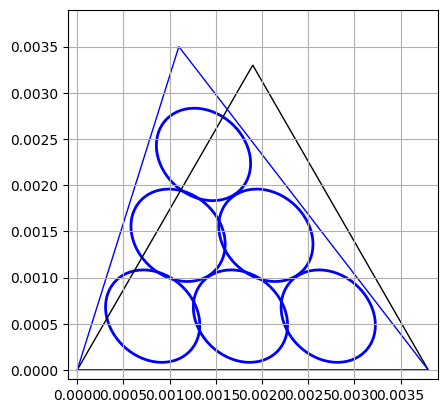

In [2]:
# gaussian settings on a triangle
barycentric_coords =  [[2/3, 1/6, 1/6], [1/6, 2/3, 1/6], [1/6, 1/6, 2/3],
                       [1/6, 5/12, 5/12], [5/12, 1/6, 5/12], [5/12, 5/12, 1/6]]

def barycentric_to_cartesian(triangle, barycentric_coords):
    return sum(vertex * weight for vertex, weight in zip(triangle, barycentric_coords))

# Group-2: Gaussians on equilateral triangle
mean_2_list = [barycentric_to_cartesian(tri2, coords) for coords in barycentric_coords]

cov3D_L = torch.t# gaussian settings on a triangle
barycentric_coords =  [[2/3, 1/6, 1/6], [1/6, 2/3, 1/6], [1/6, 1/6, 2/3],
                       [1/6, 5/12, 5/12], [5/12, 1/6, 5/12], [5/12, 5/12, 1/6]]

def barycentric_to_cartesian(triangle, barycentric_coords):
    return sum(vertex * weight for vertex, weight in zip(triangle, barycentric_coords))

# Group-2: Gaussians on equilateral triangle
mean_2_list = [barycentric_to_cartesian(tri2, coords) for coords in barycentric_coords]

cov3D_L = torch.tensor([[ 0.0005, -0.0001],
                        [ 0.0000,  0.0005]])
conv_2 = cov3D_L @ cov3D_L.T

from matplotlib.patches import Ellipse

def gaussian_to_ellipse(cov_matrix):
    eigenvalues, eigenvectors = torch.linalg.eigh(cov_matrix)
    return torch.sqrt(eigenvalues), eigenvectors

def create_ellipse(mean, std_devs, rotation, ax, color):
    angle = torch.rad2deg(torch.atan2(rotation[1, 0], rotation[0, 0]))
    ellipse = Ellipse(xy=mean.numpy(), width=2*std_devs[0].item(), height=2*std_devs[1].item(), angle=angle.item(), edgecolor=color, fc='None', lw=2)
    ax.add_patch(ellipse)

fig, ax = plt.subplots()

std_dev2, rotation2 = gaussian_to_ellipse(conv_2)
for mean_2 in mean_2_list:
    create_ellipse(mean_2, std_dev2, rotation2, ax, 'blue')

plt.gca().add_patch(plt.Polygon(tri1, edgecolor='black', fill=None))
plt.gca().add_patch(plt.Polygon(tri2, edgecolor='blue', fill=None))

plt.xlim(-0.0001, 0.0039)
plt.ylim(-0.0001, 0.0039)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()
